<a href="https://colab.research.google.com/github/qsdcfd/TIL/blob/TIL/Study__245/EDA_Primary_Key_and_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Packages


In [1]:
import os #파일 확인 가능: 현재 디렉토리,디렉토리 변경,파일 목록 확인, csv파일 호출
import gc #메모리 관리 함수 제공
import warnings #모듈을 임포트할 때 경고의 베이스 범주 제거

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
#Configuration :설정 관리
warnings.simplefilter('ignore')
pd.set_option('max_column', None)
sns.set_style('darkgrid')
colors = sns.color_palette('Set2')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#불러올 훈련 데이터 경로 설정
train_dir = '/content/drive/MyDrive/jpx-tokyo-stock-exchange-prediction/train_files' 

### 데이터 불러오기

#### 훈련 데이터 불러오기

In [7]:
%%time


df_prices = pd.read_csv(os.path.join(train_dir, 'stock_prices.csv'))
df_prices_sec = pd.read_csv(os.path.join(train_dir, 'secondary_stock_prices.csv'))
df_fins = pd.read_csv(os.path.join(train_dir, 'financials.csv'))
df_opts = pd.read_csv(os.path.join(train_dir, 'options.csv'))
df_trades = pd.read_csv(os.path.join(train_dir, 'trades.csv'))
stock_list = pd.read_csv(os.path.join('/content/drive/MyDrive/jpx-tokyo-stock-exchange-prediction/stock_list.csv'))

CPU times: user 21.1 s, sys: 5.13 s, total: 26.2 s
Wall time: 36.1 s


#### stock_prices.csv

- File Description


- Primary Key

- Missing Values

- Target Exploration

- Stock List Fusion

- Secondary Stocks

##### File Description

- 주식과 target 열에 매일 종가가 포함

- 컬럼 정보는 stock_price_spec.csv

- RowId:가격 측정의 unique id로 날짜와 보안코드로 구성 (Primary Key)

- Date: 주식 시장 날짜

- SecuritiesCode: local securities code

- Open: 시가

- High: 고가

- Low: 저가

- Close: 종가

- Volume: 주식 거래량

- AdjustmentFactor: 가격과 거래량에 대한 이론적 계산(주식의 분할과 병합이 일어날 때)

- ExpectedDividend: 기댓값으로 분할 금액의 frequency와 연관이 있다. 그리고, 가장 많은 missing 값을 가지고 있으므로 주의 깊게 봐야함

- SupervisionFlag:supervision and securities 정보

- Target: 주식 시장 당일, t+2,t+1,t+0 사이에 적용되는 종가 비율


##### stock_price.csv


In [10]:
#함수를 설정하여 csv파일의 결측치 비율과 구성 체크 가능
def summarize(df, file_name, n_rows_to_show = 10): 
    """ 
    간단한게 DF설명해드립니다.

    파라미터:
        df: pd.DataFrame, raw DataFrame
        file_name: str, name of the file
        n_rows_to_show: int, number of rows to show
    """
    print(f"----Summary of {file_name}----")
    print(f'shape: {df.shape}')

    #데이터 분석에서 필요한 결측치 비율 파악
    nan_ratio = pd.isna(df).sum() / len(df) * 100
    nan_ratio.sort_values(ascending=False, inplace=True)
    nan_ratio = nan_ratio.to_frame(name = 'NaN Ratio').T #df으로 바꾸고 1 * N의 형태로 바뀜
    print('NaN ratio:')
    display(nan_ratio)

    display(df.head(n_rows_to_show))

In [11]:
summarize(df_prices, 'stock_prices.csv')

----Summary of stock_prices.csv----
shape: (2332531, 12)
NaN ratio:


,ExpectedDividend,Open,High,Low,Close,Target,RowId,Date,SecuritiesCode,Volume,AdjustmentFactor,SupervisionFlag
NaN Ratio,99.191222,0.326169,0.326169,0.326169,0.326169,0.010204,0.0,0.0,0.0,0.0,0.0,0.0


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
5,20170104_1379,2017-01-04,1379,2105.0,2147.0,2101.0,2143.0,77300,1.0,NaN,False,0.005169
6,20170104_1381,2017-01-04,1381,1950.0,1960.0,1949.0,1960.0,1300,1.0,NaN,False,-0.009326
7,20170104_1407,2017-01-04,1407,857.0,877.0,851.0,866.0,147000,1.0,NaN,False,-0.003437
8,20170104_1414,2017-01-04,1414,4940.0,5060.0,4935.0,5050.0,119600,1.0,NaN,False,0.000000
9,20170104_1417,2017-01-04,1417,1051.0,1063.0,1048.0,1053.0,347500,1.0,NaN,False,-0.007463


##### RowID

In [13]:
row_id = (df_prices['Date'].apply(lambda data: ''.join(data.split('-'))+'_')
                                                                        + df_prices['SecuritiesCode'].astype(str))
assert(df_prices['RowId'] == row_id).all()

In [17]:
#nunique()함수
#데이터에 고유값들의 수를 출력해주는 함수입니다.
#출력된 결과를 보면 품목들의 수를 알려주고 있습니다. 
#데이터의 고유값의 총 수를 알고 싶을때 유용한 함수입니다.
n_dates = df_prices['Date'].nunique()
date_min, date_max = df_prices['Date'].min(), df_prices['Date'].max()
n_stocks = df_prices['SecuritiesCode'].nunique()

print(f"Number of unique dates: {n_dates} ({date_min} ~ {date_max})\n"
      f"Number of unique stocks: {n_stocks}")

Number of unique dates: 1202 (2017-01-04 ~ 2021-12-03)
Number of unique stocks: 2000


사실, 주식의 90%는 이미 훈련기간(2017-01-04 ~ 2021-12-03)동안 끝났습니다.

그러나, ExpectedDividend, price columns의 컬럼에 들어있는 missing values을 주의깊게 봐야합니다

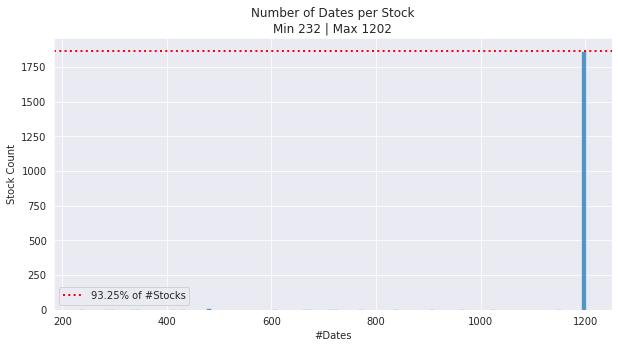

In [19]:
#시각화를 통해서 RowID에 대해서 더 알아보겠습니다.
from matplotlib import pyplot as plt
n_dates_per_stock = df_prices.groupby(['SecuritiesCode'])['Date'].count()
stock_cnt_max = (n_dates_per_stock == n_dates_per_stock.max()).sum()
stock_ratio_max = stock_cnt_max / len(n_dates_per_stock) * 100

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=n_dates_per_stock.values, bins=100, palette=colors, ax=ax)
ax.axhline(y=stock_cnt_max, color='red', linestyle='dotted', linewidth=2,
           label=f'{stock_ratio_max}% of #Stocks')
ax.set_title(f"Number of Dates per Stock\nMin {n_dates_per_stock.min()} | "
             f"Max {n_dates_per_stock.max()}")
ax.set_xlabel("#Dates")
ax.set_ylabel("Stock Count")
ax.legend()
plt.show()


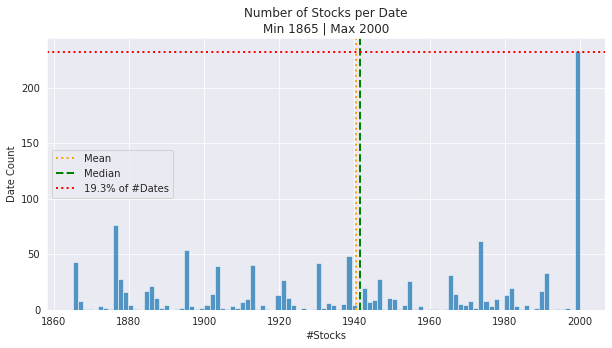

In [20]:
#Tradind data missing values

n_stocks_per_date = df_prices.groupby(['Date'])['SecuritiesCode'].count()
date_cnt_max = (n_stocks_per_date == n_stocks_per_date.max()).sum()
date_ratio_max = round(date_cnt_max / len(n_stocks_per_date) * 100, 2)


fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=n_stocks_per_date.values, bins=100, palette=colors, ax=ax)
ax.axvline(x=n_stocks_per_date.mean(), color='orange', linestyle='dotted',
           linewidth=2, label='Mean')
ax.axvline(x=n_stocks_per_date.median(), color='green', linestyle='--',
           linewidth=2, label='Median')
ax.axhline(y=date_cnt_max, color='red', linestyle='dotted', linewidth=2,
           label=f'{date_ratio_max}% of #Dates')
ax.set_title(f"Number of Stocks per Date\nMin {n_stocks_per_date.min()} | "
             f"Max {n_stocks_per_date.max()}")
ax.set_xlabel("#Stocks")
ax.set_ylabel("Date Count")
ax.legend()
plt.show()